<a href="https://colab.research.google.com/github/evakaldy/Bootcamp_Final_Project/blob/eva_database_exploration/explore_database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
# Krok 1: Připojte Google Disk
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Krok 2: Cesta k databázi na Google Disku
# Nahraďte 'path_to_your_database.db' skutečnou cestou k databázovému souboru na Google Disku
db_path = '/content/drive/MyDrive/Colab Notebooks/INTENSIVE_part_offline/final_project/data.db'


In [62]:
import sqlite3
import pandas as pd


# Connect to a SQLite database (or create one)
conn = sqlite3.connect(db_path)
cursor = conn.cursor()

In [63]:
# Výpis všech tabulek
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Výpis názvů tabulek
for table in tables:
    print(table[0])

Accounts
sqlite_sequence
Campaigns
Clients
Outcomes


In [64]:
accounts_df = pd.read_sql_query("select * from Campaigns", conn)
accounts_df

,id,account_id,day,month,duration,campaign,pdays,previous
0,1,1,5,may,261,1,-1,0
1,2,2,5,may,151,1,-1,0
2,3,3,5,may,76,1,-1,0
3,4,4,5,may,92,1,-1,0
4,5,5,5,may,198,1,-1,0
...,...,...,...,...,...,...,...,...
45206,45207,45207,17,nov,977,3,-1,0
45207,45208,45208,17,nov,456,2,-1,0
45208,45209,45209,17,nov,1127,5,184,3
45209,45210,45210,17,nov,508,4,-1,0


In [65]:
campaigns_df = pd.read_sql_query("select * from Campaigns", conn)
campaigns_df

,id,account_id,day,month,duration,campaign,pdays,previous
0,1,1,5,may,261,1,-1,0
1,2,2,5,may,151,1,-1,0
2,3,3,5,may,76,1,-1,0
3,4,4,5,may,92,1,-1,0
4,5,5,5,may,198,1,-1,0
...,...,...,...,...,...,...,...,...
45206,45207,45207,17,nov,977,3,-1,0
45207,45208,45208,17,nov,456,2,-1,0
45208,45209,45209,17,nov,1127,5,184,3
45209,45210,45210,17,nov,508,4,-1,0


 Is campaigns_df['account_id'] unique? True
 Is campaigns_df['id'] unique? True

campaigns_df['pdays'] count: pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64


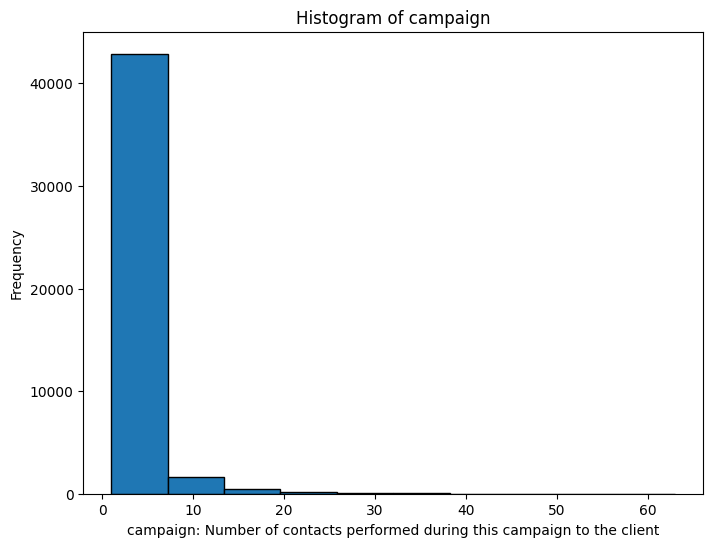

In [66]:
# explore the campaign table

print(f" Is campaigns_df['account_id'] unique?", campaigns_df['account_id'].is_unique)
print(f" Is campaigns_df['id'] unique?", campaigns_df['id'].is_unique)

print()
value_counts = campaigns_df["pdays"].value_counts()

print(f"campaigns_df['pdays'] count: {value_counts}")


import matplotlib.pyplot as plt
import seaborn as sns  # Optional, if you want to use seaborn for a more stylish plot

plt.figure(figsize=(8, 6))  # Optional, adjust figure size
plt.hist(campaigns_df['campaign'], bins=10, edgecolor="black")  # Adjust number of bins as needed
plt.title("Histogram of campaign")
plt.xlabel("campaign: Number of contacts performed during this campaign to the client")
plt.ylabel("Frequency")
plt.show()

In [69]:
# To connect the Outcomes and Campaigns tables from your SQLite database on the Campaigns.ID and Outcomes.campaign_id

query = """
SELECT *
FROM Outcomes
JOIN Campaigns
ON Outcomes.campaign_id = Campaigns.ID
JOIN Accounts
ON Campaigns.account_id = Accounts.ID
JOIN Clients
ON Accounts.client_id = Clients.ID;
"""

# Execute the query and fetch the result into a DataFrame
merged_pd = pd.read_sql_query(query, conn)
print(merged_pd.shape)
# Display the joined DataFrame
print(merged_pd.head())

(45211, 24)
   id  campaign_id poutcome        y  id  account_id  day month  duration  \
0   1            1  unknown  unknown   1           1    5   may       261   
1   2            2  unknown  unknown   2           2    5   may       151   
2   3            3  unknown  unknown   3           3    5   may        76   
3   4            4  unknown  unknown   4           4    5   may        92   
4   5            5  unknown  unknown   5           5    5   may       198   

   campaign  ...  in_default  balance  housing  loan  contact       id age  \
0         1  ...          no   2143.0      yes    no  unknown  4815378  58   
1         1  ...          no     29.0      yes    no  unknown  5217541  44   
2         1  ...          no      2.0      yes   yes  unknown  6654642  33   
3         1  ...          no   1506.0      yes    no  unknown  1421898  47   
4         1  ...          no      1.0       no    no  unknown  2387933  33   

            job  marital  education  
0    management  m

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Create a LabelEncoder instance
encoder = LabelEncoder()

In [68]:
# conn.close()